<a href="https://colab.research.google.com/github/HafizAQ/ML_Practices/blob/main/Deep_Learning_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Courtesy: https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/
#Neural Network (NN)
- **Computational models** that **mimic** the complex functions of the **human brain**
- Consists of neurons to process and learn from data
- Pattern recognition and decision making in ML
- NN extract identifying features from data, lacking pre-programmed understanding

####Evolution of NN

- 1940s-1950s: Early Concepts
- 1960s-1970s: Perceptrons
- 1980s: Backpropagation and Connectionism
- 1990s: Boom (pattern recognition) and winter (computational costs)
- 2000s: Resurgence and Deep Learning (larger dataset)
- 2010s-Present: DL Dominance

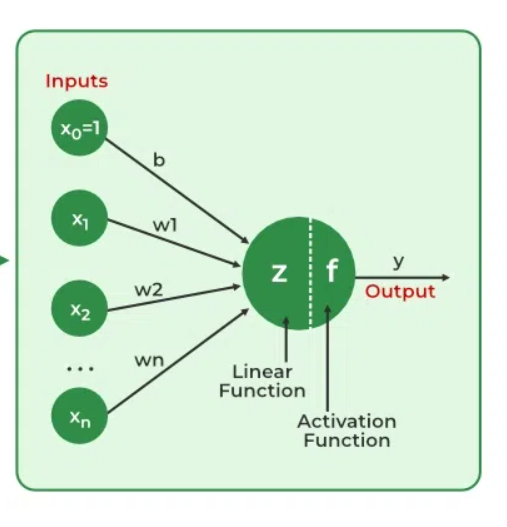

####Forward Propagation:
- Input Layer: Each feature is a node receiving input data.
- Weights and Connections: Weights define the strength of connections and are adjusted during training.
- Hidden Layers: Neurons process inputs by applying weights and activation functions to introduce non-linearity for pattern recognition.
- Output Layer: The final result is produced by propagating through the network.

####Backpropagation:
- Loss Calculation: The output is compared to the target, and the loss (e.g., Mean Squared Error) is calculated.
- Gradient Descent: The network adjusts weights to minimize the loss by computing the gradient.
- Training: This process is repeated iteratively to adapt and learn patterns from the data.
- Activation Functions: Functions like ReLU or sigmoid introduce non-linearity to model complex patterns.


####Types of Neural Networks (supervised learning)
- **Feedforward Neural Network (FNN)**: NN in singal direction architecture, feedback loops are absent. Applications such as regression and pattern recognition
- **Multi-layer Perceptron (MLP)**: A type of feedforward neural network with an input layer, one or more hidden layers, and an output layer, using nonlinear activation functions. Application such as regression problem, binary/ multi-class problem
- **Convolutional Neural Network (CNN)**: A neural network designed for image processing, using convolutional layers to learn features for tasks like image recognition and object detection.
- **Recurrent Neural Network (RNN)**: A neural network designed for sequential data, utilizing feedback loops to handle dependencies in tasks like time series prediction and natural language processing.
- **Long Short-Term Memory (LSTM)**: A variant of RNN that addresses the vanishing gradient problem, using memory cells and gates to manage long-term information. LSTM has three gates (input, forget, and output gates) and uses memory cells to store information over long periods.
- **Gated Recurrent Unit (GRU):** A simple variant of RNN. GRU: Has two gates (reset and update gates) and combines the memory cell and hidden state, making it simpler and faster to train than LSTM.

In [1]:
import numpy as np

# array of any amount of numbers. n = m
X = np.array([[1, 2, 3],
			[3, 4, 1],
			[2, 5, 3]])

# multiplication
y = np.array([[.5, .3, .2]])

# transpose of y
y = y.T

# sigma value
sigm = 2

# find the delta
delt = np.random.random((3, 3)) - 1

for j in range(100):

	# find matrix 1. 100 layers.
	m1 = (y - (1/(1 + np.exp(-(np.dot((1/(1 + np.exp(
		-(np.dot(X, sigm))))), delt))))))*((1/(
			1 + np.exp(-(np.dot((1/(1 + np.exp(
				-(np.dot(X, sigm))))), delt)))))*(1-(1/(
					1 + np.exp(-(np.dot((1/(1 + np.exp(
						-(np.dot(X, sigm))))), delt)))))))

	# find matrix 2
	m2 = m1.dot(delt.T) * ((1/(1 + np.exp(-(np.dot(X, sigm)))))
						* (1-(1/(1 + np.exp(-(np.dot(X, sigm)))))))
	# find delta
	delt = delt + (1/(1 + np.exp(-(np.dot(X, sigm))))).T.dot(m1)

	# find sigma
	sigm = sigm + (X.T.dot(m2))

# print output from the matrix
print(1/(1 + np.exp(-(np.dot(X, sigm)))))


[[0.99999326 0.99999376 0.99999362]
 [0.99999988 0.99999989 0.99999988]
 [1.         1.         1.        ]]


#**i) Feedforward Neural Network (FNN)**:

NN in singal direction architecture, feedback loops are absent. Applications such as regression and pattern recognition


#**ii) Multi-layer Perceptron (MLP)**:

A type of feedforward neural network with an input layer, one or more hidden layers, and an output layer, using nonlinear activation functions. Application such as regression problem, binary/ multi-class problem


#**iii) Convolutional Neural Network (CNN)**:

Implementation: https://www.geeksforgeeks.org/introduction-convolution-neural-network/


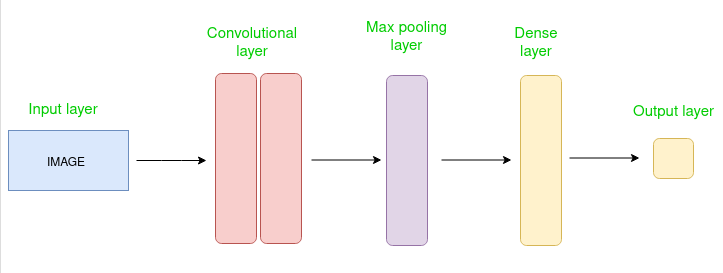

**Advantages**

- Excellent at detecting patterns in images, videos, and audio.
- Robust to translation, rotation, and scaling variations.
- Eliminates the need for manual feature extraction with end-to-end training.
- Can handle large datasets and achieve high accuracy.

**Disadvantages**

- Computationally expensive and memory-intensive to train.
- Prone to overfitting with small datasets or improper regularization.
- Requires large amounts of labeled data.
- Limited interpretability, making it hard to understand what the network has learned.

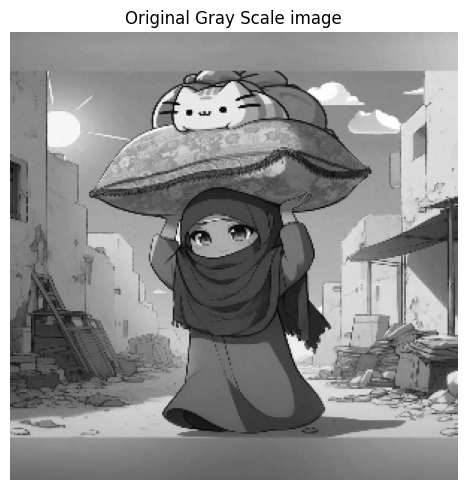

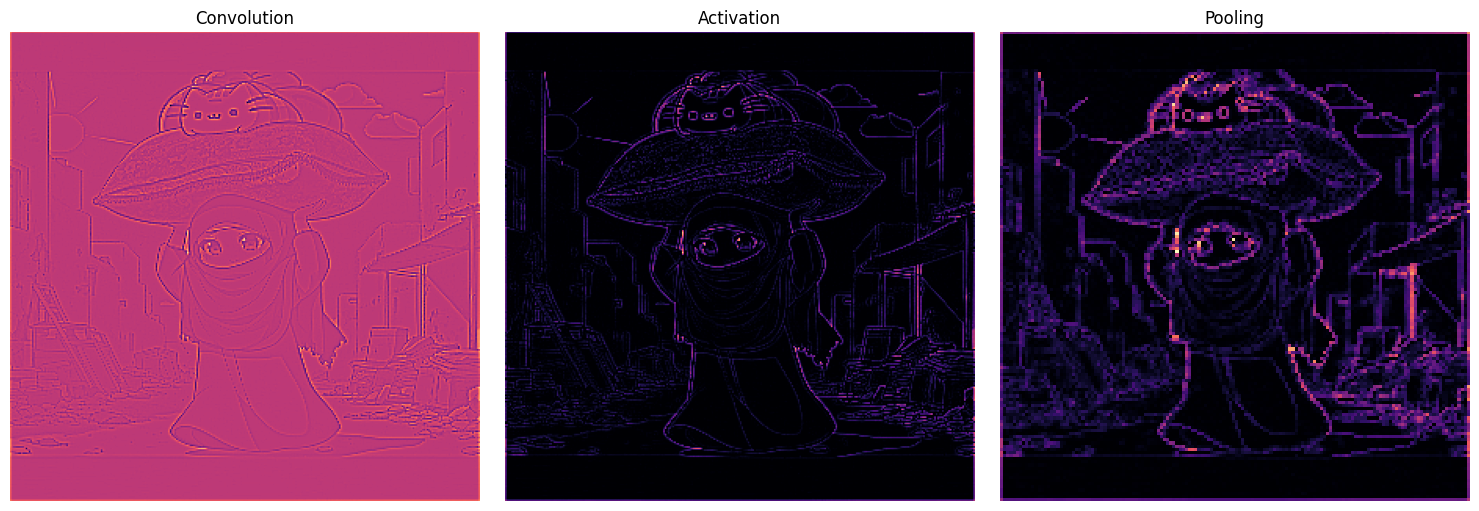

In [3]:
# i) import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# ii) set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# iii) define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

# iv) load the image
image = tf.io.read_file('pic1.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# v) plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


# vi) Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# v) convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.figure(figsize=(15, 5))

# vi) Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# vii) Activation layer
relu_fn = tf.nn.relu
# viii) Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

# ix) Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

Courtesy: https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/

#**iv) Recurrent Neural Network (RNN)**:

A neural network designed for sequential data, utilizing feedback loops to handle dependencies in tasks like time series prediction and natural language processing.

- Works better than a simple NN when data is sequential like Time-Series data and Text data

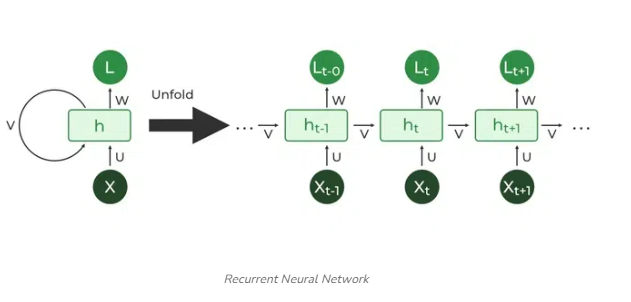

- RNNs have a looping structure while FNNs don't have a looping structure
- Four types of RNNs based on the number of inputs and outputs in the network:(i) One to One (ii) One to Many (iii) Many to One (iv) Many to Many

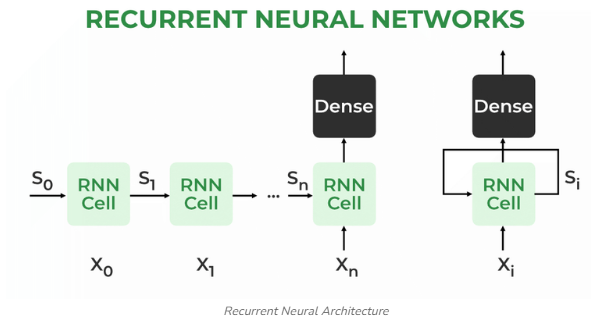


The formula for calculating the current state:

ht=f(ht−1,xt)

where,

ht -> current state
ht-1 -> previous state
xt -> input state
Formula for applying Activation function(tanh)

ht=tanh(Whh ht−1 + Wxh xt)

where,

whh -> weight at recurrent neuron
wxh -> weight at input neuron

The formula for calculating output:
yt=Why ht yt=Why ht
Yt -> output
Why -> weight at output layer

- Backpropagation Through Time (BPTT)

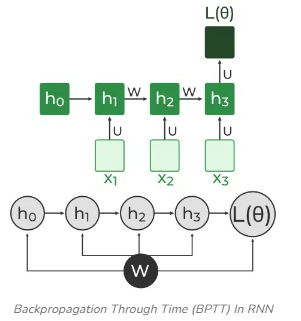


####**Issues with Standard RNNs**

- Vanishing Gradient: RNNs struggle with time-dependent data (e.g., text generation, translation) due to gradient decay during training.
- Exploding Gradient: When gradients grow exponentially, large weight updates make training unstable.

####**RNN Training Process**

- Input a single-time step.
- Compute current state using current input and previous state.
- Repeat for subsequent time steps.
- Calculate output and compare it to the target.
- Backpropagate error to update weights using backpropagation through time.

####**Advantages of RNN**

- Remembers information over time, making it ideal for time-series prediction.
- Can be used with convolutional layers for enhanced feature extraction.

####**Disadvantages of RNN**

- Suffers from vanishing/exploding gradients.
- Difficult to train and unsuitable for long sequences with tanh or ReLU activation.


####**Application of RNN**

- Language Modelling and Generating Text
- Speech Recognition
- Machine Translation
- Image Recognition, face detection
- Time series forcasting


In [6]:
#i) Imported Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [9]:
# ii) Example text as input
text = "We Love ICPS (Institute of intelligent cyber physical systems)"
print("text",text)
print(type(text))

chars = sorted(list(set(text)))
print("chars",chars)
print(type(chars))
char_to_index = {char: i for i, char in enumerate(chars)}
print("char to index",char_to_index)
print(type(char_to_index))
index_to_char = {i: char for i, char in enumerate(chars)}
print("index to chars",index_to_char)
print(type(index_to_char))

text We Love ICPS (Institute of intelligent cyber physical systems)
<class 'str'>
chars [' ', '(', ')', 'C', 'I', 'L', 'P', 'S', 'W', 'a', 'b', 'c', 'e', 'f', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'y']
<class 'list'>
char to index {' ': 0, '(': 1, ')': 2, 'C': 3, 'I': 4, 'L': 5, 'P': 6, 'S': 7, 'W': 8, 'a': 9, 'b': 10, 'c': 11, 'e': 12, 'f': 13, 'g': 14, 'h': 15, 'i': 16, 'l': 17, 'm': 18, 'n': 19, 'o': 20, 'p': 21, 'r': 22, 's': 23, 't': 24, 'u': 25, 'v': 26, 'y': 27}
<class 'dict'>
index to chars {0: ' ', 1: '(', 2: ')', 3: 'C', 4: 'I', 5: 'L', 6: 'P', 7: 'S', 8: 'W', 9: 'a', 10: 'b', 11: 'c', 12: 'e', 13: 'f', 14: 'g', 15: 'h', 16: 'i', 17: 'l', 18: 'm', 19: 'n', 20: 'o', 21: 'p', 22: 'r', 23: 's', 24: 't', 25: 'u', 26: 'v', 27: 'y'}
<class 'dict'>


In [12]:
#iii) Convert input sequence and corresponding labels for further implementation
seq_length = 3
sequences = []
labels = []
for i in range(len(text) - seq_length): seq = text[i:i+seq_length]
label = text[i+seq_length]
print("label", label)
print(type(label))
sequences.append([char_to_index[char] for char in seq])
print("sequences", sequences)
print(type(sequences))
labels.append(char_to_index[label])
print("labels", labels)
print(type(labels))

label )
<class 'str'>
sequences [[12, 18, 23]]
<class 'list'>
labels [2]
<class 'list'>


In [18]:
#iv) Convert sequence and labels into numpy arrays and used one-hot encoding to convert text into vector
X = np.array(sequences)
print("X", X)
print(type(X))
y = np.array(labels)
print("y", y)
print(type(y))
X_one_hot = tf.one_hot(X, len(chars))
print("X_one_hot", X_one_hot)
print(type(X_one_hot))
y_one_hot = tf.one_hot(y, len(chars))
print("y_one_hot", y_one_hot)
print(type(y_one_hot))

X [[12 18 23]]
<class 'numpy.ndarray'>
y [2]
<class 'numpy.ndarray'>
X_one_hot tf.Tensor(
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
   0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   1. 0. 0. 0. 0.]]], shape=(1, 3, 28), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
y_one_hot tf.Tensor(
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]], shape=(1, 28), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [19]:
#v) Build RNN Model using ‘relu’ and ‘softmax‘ activation functions

model= Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
print("model output shape: ", model.output_shape)
model.add(Dense(len(chars), activation='softmax'))
print("model output shape: ", model.output_shape)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model output shape:  (None, 50)
model output shape:  (None, 28)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           3,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 28)                  │           1,428 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,378 (21.01 KB)

 Trainable params: 5,378 (21.01 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#vi) Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("model output shape: ", model.output_shape)
model.summary()

model output shape:  (None, 28)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           3,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 28)                  │           1,428 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,378 (21.01 KB)

 Trainable params: 5,378 (21.01 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#vii) Model Training: input sequence (X_on_hot) and corresponding labels (y_one_hot) for 100 epochs, model trained using the model.fil line, which optimises the model parameters to minimise the categorical crossentropy loss
model.fit(X_one_hot, y_one_hot, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 3.3532
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.0000e+00 - loss: 3.3178
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 3.2826
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0000e+00 - loss: 3.2479
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 3.2133
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 3.1787
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 3.1453
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0000e+00 - loss: 3.1121
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 3.0792
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 3.0467
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 3.0147
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58m

In [27]:
#viii) Model Prediction:  Generated text using pre-trained model

start_seq = "We love " # Remove the underscore from the start sequence
generated_text = start_seq
for i in range(50):
  x = np.array([[char_to_index.get(char, 0) for char in generated_text[-seq_length:]]]) # Handle unknown characters
  x_one_hot = tf.one_hot(x, len(chars))
  prediction = model.predict(x_one_hot)
  next_index = np.argmax(prediction)
  next_char = index_to_char[next_index]
  generated_text += next_char
print("Generated Text:")
print(generated_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

#**v) Long Short-Term Memory (LSTM)**:

A variant of RNN that addresses the vanishing gradient problem, using memory cells and gates to manage long-term information. LSTM has three gates (input, forget, and output gates) and uses memory cells to store information over long periods.

#**vi) Gated Recurrent Unit (GRU):**

A simple variant of RNN. GRU: Has two gates (reset and update gates) and combines the memory cell and hidden state, making it simpler and faster to train than LSTM.